In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('Train House Prices.csv')
print(df.shape)
df.head(10)
df2 = pd.read_csv('Train House Prices.csv')

(29451, 12)


# Data Wrangling
Null values breakdown and assigning the relevant data-types to the data

In [3]:
# in the database the LONGITUDE AND LATITTUDE are labelled wrongly
df.rename(columns = {'LATITUDE': 'LONGITUDE', 'LONGITUDE':'LATITUDE'}, inplace = True)

df.rename(columns = {'BHK_NO.':'BHK'}, inplace= True)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
ful_add = df['ADDRESS']
city =[]
for i in ful_add:
    j = i.split(',')[-1]
    city.append(j)
print(city[0:5])
# ALTERNATIVE METHOD
# df.ADDRESS = df.ADDRESS.apply(lambda x: x.split(',')[-1])

['Bangalore', 'Mysore', 'Bangalore', 'Ghaziabad', 'Kolkata']


In [5]:
{'City': city}
df['City'] = city
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [6]:
# INDIA latitudanal and longitudanal constraints
del_lat_north= df[df['LATITUDE']>35.15].index
df.drop(del_lat_north, inplace = True)
del_lat_south = df[df['LATITUDE'] <8.077 ].index
df.drop(del_lat_south, inplace = True)

del_long_east = df[df['LONGITUDE'] >97.352216 ].index
df.drop(del_long_east, inplace = True)
del_long_west = df[df['LONGITUDE']< 68.1927].index
df.drop(del_long_west, inplace = True)
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City
29445,Owner,0,0,2,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Belgaum
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8,Jaipur


In [7]:
# Automated program :- Missing Values for each COLUMN
column_list = df.columns
non_null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()<1] 
for attribute in non_null_column_values:
    print(attribute,':' ,np.round(df[attribute].isnull().sum().mean(), 4),'% missing values')
print('\n')
print('non null columns', non_null_column_values) 
print('\n')
null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()>1 ] 
print('NULL COLUMNS == ', null_column_values)

print('Columns with NO NULL Values== ', len(non_null_column_values))
print('Columns with NULL values ==', len(null_column_values))
# INFERENCE : No columns have any missing values

POSTED_BY : 0.0 % missing values
UNDER_CONSTRUCTION : 0.0 % missing values
RERA : 0.0 % missing values
BHK : 0.0 % missing values
BHK_OR_RK : 0.0 % missing values
SQUARE_FT : 0.0 % missing values
READY_TO_MOVE : 0.0 % missing values
RESALE : 0.0 % missing values
ADDRESS : 0.0 % missing values
LATITUDE : 0.0 % missing values
LONGITUDE : 0.0 % missing values
TARGET(PRICE_IN_LACS) : 0.0 % missing values
City : 0.0 % missing values


non null columns ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)', 'City']


NULL COLUMNS ==  []
Columns with NO NULL Values==  13
Columns with NULL values == 0


In [8]:
# Removing 90% empty columns 
print('The number of null values in each column = ')
print(df.isnull().sum())
threshold = len(df)* 0.1
df.dropna(thresh = threshold , axis = 1, inplace = True )
print('After removing columns with more than 90% values')
print(df.isnull().sum())
# INFERENCE : No column is 90 % empty ; hence no missing values have to be filled in  

The number of null values in each column = 
POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK                      0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
TARGET(PRICE_IN_LACS)    0
City                     0
dtype: int64
After removing columns with more than 90% values
POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK                      0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
TARGET(PRICE_IN_LACS)    0
City                     0
dtype: int64


In [9]:
df.info()
# INFERENCE : 258 ROWS removed due to geographic location range
# 29193 rows retained
df.describe()
# Basic Statisitical Details listed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29193 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29193 non-null  object 
 1   UNDER_CONSTRUCTION     29193 non-null  int64  
 2   RERA                   29193 non-null  int64  
 3   BHK                    29193 non-null  int64  
 4   BHK_OR_RK              29193 non-null  object 
 5   SQUARE_FT              29193 non-null  float64
 6   READY_TO_MOVE          29193 non-null  int64  
 7   RESALE                 29193 non-null  int64  
 8   ADDRESS                29193 non-null  object 
 9   LATITUDE               29193 non-null  float64
 10  LONGITUDE              29193 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29193 non-null  float64
 12  City                   29193 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 3.1+ MB


,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS)
count,29193.000000,29193.000000,29193.000000,2.919300e+04,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000
mean,0.180591,0.319768,2.391772,1.996486e+04,0.819409,0.929264,21.158718,77.268996,143.305037
std,0.384686,0.466395,0.880195,1.909718e+06,0.384686,0.256388,5.863616,4.147392,659.686518
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,8.513294,69.104114,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.442587,73.809700,38.000000
50%,0.000000,0.000000,2.000000,1.174114e+03,1.000000,1.000000,20.450000,77.326457,62.000000
75%,0.000000,1.000000,3.000000,1.550246e+03,1.000000,1.000000,26.862600,77.786000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,34.552275,95.000000,30000.000000


<AxesSubplot:xlabel='City'>

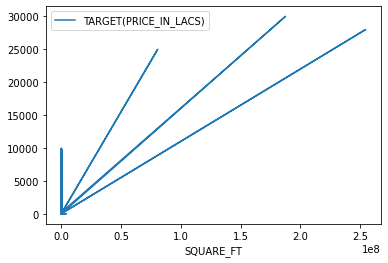

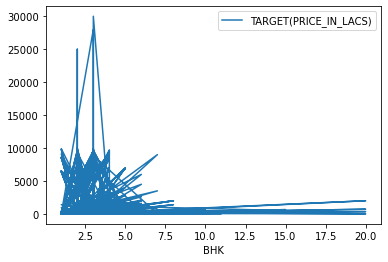

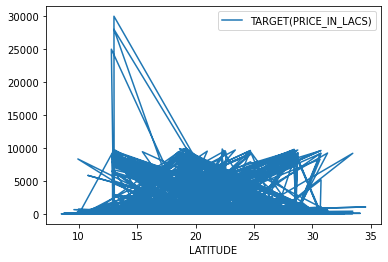

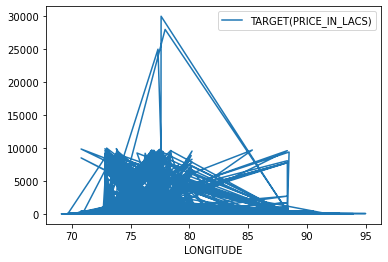

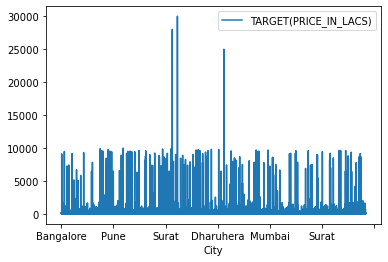

In [10]:
df.plot.line(x = 'SQUARE_FT', y= 'TARGET(PRICE_IN_LACS)')
df.plot.line(x = 'BHK', y= 'TARGET(PRICE_IN_LACS)')
df.plot.line(x = 'LATITUDE', y= 'TARGET(PRICE_IN_LACS)')
df.plot.line(x = 'LONGITUDE', y= 'TARGET(PRICE_IN_LACS)')
df.plot.line(x = 'City', y = 'TARGET(PRICE_IN_LACS)')

In [11]:
# data normalization
# simple scaling
print('Max value divide for BHK_NO. = ', df['BHK'].max())
print('Max value divide for SQUARE_FT',df['SQUARE_FT'].max())
print('Max value divide for TARGET(PRICE_IN_LACS)',  df['TARGET(PRICE_IN_LACS)'].max())
df['BHK'] = df['BHK']/df['BHK'].max()
df['SQUARE_FT'] = df['SQUARE_FT']/ df['SQUARE_FT'].max()
df['TARGET(PRICE_IN_LACS)'] = df['TARGET(PRICE_IN_LACS)']/ df['TARGET(PRICE_IN_LACS)'].max()
df.describe()

Max value divide for BHK_NO. =  20
Max value divide for SQUARE_FT 254545454.5
Max value divide for TARGET(PRICE_IN_LACS) 30000.0


,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS)
count,29193.000000,29193.000000,29193.000000,2.919300e+04,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000
mean,0.180591,0.319768,0.119589,7.843336e-05,0.819409,0.929264,21.158718,77.268996,0.004777
std,0.384686,0.466395,0.044010,7.502462e-03,0.384686,0.256388,5.863616,4.147392,0.021990
min,0.000000,0.000000,0.050000,1.178571e-08,0.000000,0.000000,8.513294,69.104114,0.000008
25%,0.000000,0.000000,0.100000,3.535714e-06,1.000000,1.000000,18.442587,73.809700,0.001267
50%,0.000000,0.000000,0.100000,4.612592e-06,1.000000,1.000000,20.450000,77.326457,0.002067
75%,0.000000,1.000000,0.150000,6.090253e-06,1.000000,1.000000,26.862600,77.786000,0.003333
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,34.552275,95.000000,1.000000


# OUTLIER Removal Programs using Interquartile range concept
sorted(df)
Q1<column_name>=df['<COLUMN(QUANTITATIVE)>'].quantile(0.25)
Q3<column_name>=df['<COLUMN(QUANTITATIVE)>'].quantile(0.75)
IQR<column_name>=Q3<column_name>-Q1<column_name>
print('interquartile range :=',IQR<column_name>)
outlier_result_<column_name> = (df['<COLUMN(QUANTITATIVE)>'] < (Q1<column_name> - 1.5 * IQR<column_name>)) |(df['<COLUMN(QUANTITATIVE)>'] > (Q3<column_name> + 1.5 * IQR<column_name>))
print(outlier_result_<column_name>)
OUTLIERS = [outliers for outliers in outlier_result_<column_name>]
print('COUNT OF OUTLIERS==',OUTLIERS.count(True))
print(df.shape)

del_<COLUMN(quantitative)>_down=df[df['<COLUMN(QUANTITATIVE)>'] < (Q1<column_name> - 1.5 * IQR<column_name>)].index
df.drop(del_<COLUMN(quantitative)>_down, inplace = True)
del_<COLUMN(quantitative)>_up=df[df['<COLUMN(QUANTITATIVE)>'] >(Q3<column_name> + 1.5 *IQR<column_name>)].index
df.drop(del_<COLUMN(quantitative)>_up, inplace = True)
print(df.shape)


In [13]:
df.shape

(29193, 13)

In [14]:

sorted(df)

Q1=df['BHK'].quantile(0.25)
Q3=df['BHK'].quantile(0.75)
IQR=Q3-Q1
print('interquartile range :=',IQR)
outlier_result = (df['BHK'] < (Q1 - 1.5 * IQR)) |(df['BHK'] > (Q3 + 1.5 * IQR))
print(outlier_result)
OUTLIERS = [outliers for outliers in outlier_result]
print('COUNT OF OUTLIERS==',OUTLIERS.count(True))
print(df.shape)

del_bhk_down=df[df['BHK'] < (Q1 - 1.5 * IQR)].index
df.drop(del_bhk_down, inplace = True)
del_bhk_up=df[df['BHK'] >(Q3 + 1.5 *IQR)].index
df.drop(del_bhk_up, inplace = True)
print(df.shape)

sorted(df)
Q1_sqft=df['SQUARE_FT'].quantile(0.25)
Q3_sqft=df['SQUARE_FT'].quantile(0.75)
IQR_sqft=Q3_sqft-Q1_sqft
print('interquartile range :=',IQR_sqft)
outlier_result_sqft = (df['SQUARE_FT'] < (Q1_sqft - 1.5 * IQR_sqft)) |(df['SQUARE_FT'] > (Q3_sqft + 1.5 * IQR_sqft))
print(outlier_result_sqft)
OUTLIERS_sqft = [outliers_sqft for outliers_sqft in outlier_result_sqft]
print('COUNT OF OUTLIERS==',OUTLIERS_sqft.count(True))
print('square feet', df.shape)
del_sqft_down=df[df['SQUARE_FT'] < (Q1_sqft - 1.5 * IQR_sqft)].index
df.drop(del_sqft_down, inplace = True)
del_sqft_up=df[df['SQUARE_FT'] >(Q3_sqft + 1.5 *IQR_sqft)].index
df.drop(del_sqft_up, inplace = True)
print(df.shape)

sorted(df)
Q1_price=df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
Q3_price=df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR_price=Q3_price-Q1_price
print('interquartile range :=',IQR)
outlier_result_price = (df['TARGET(PRICE_IN_LACS)'] < (Q1_price - 1.5 * IQR_price)) |(df['TARGET(PRICE_IN_LACS)'] > (Q3_price + 1.5 * IQR_price))
print(outlier_result_price)
OUTLIERS_price = [outliers_price for outliers_price in outlier_result_price]
print('COUNT OF OUTLIERS==',OUTLIERS_price.count(True))
print('price', df.shape)
del_price_down=df[df['TARGET(PRICE_IN_LACS)'] < (Q1_price - 1.5 * IQR_price)].index
df.drop(del_price_down, inplace = True)
del_price_up=df[df['TARGET(PRICE_IN_LACS)'] >(Q3_price + 1.5 *IQR_price)].index
df.drop(del_price_up, inplace = True)
print(df.shape)
sorted(df)
Q1_price=df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
Q3_price=df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR_price=Q3_price-Q1_price
print('interquartile range :=',IQR)
outlier_result_price = (df['TARGET(PRICE_IN_LACS)'] < (Q1_price - 1.5 * IQR_price)) |(df['TARGET(PRICE_IN_LACS)'] > (Q3_price + 1.5 * IQR_price))
print(outlier_result_price)
OUTLIERS_price = [outliers_price for outliers_price in outlier_result_price]
print('COUNT OF OUTLIERS==',OUTLIERS_price.count(True))
print('price', df.shape)
del_price_down=df[df['TARGET(PRICE_IN_LACS)'] < (Q1_price - 1.5 * IQR_price)].index
df.drop(del_price_down, inplace = True)
del_price_up=df[df['TARGET(PRICE_IN_LACS)'] >(Q3_price + 1.5 *IQR_price)].index
df.drop(del_price_up, inplace = True)
print(df.shape)



# To furthermore remove outliers
sorted(df)
sorted(df)
Q1_price_1=df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
Q3_price_1=df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR_price_1=Q3_price_1-Q1_price_1
print('interquartile range :=',IQR)
outlier_result_price_1 = (df['TARGET(PRICE_IN_LACS)'] < (Q1_price_1 - 1.5 * IQR_price_1)) |(df['TARGET(PRICE_IN_LACS)'] > (Q3_price_1 + 1.5 * IQR_price_1))
print(outlier_result_price_1)
OUTLIERS_price_1 = [outliers_price_1 for outliers_price_1 in outlier_result_price_1]
print('COUNT OF OUTLIERS==',OUTLIERS_price_1.count(True))
print('price', df.shape)
del_price_1_down=df[df['TARGET(PRICE_IN_LACS)'] < (Q1_price_1 - 1.5 * IQR_price_1)].index
df.drop(del_price_1_down, inplace = True)
del_price_1_up=df[df['TARGET(PRICE_IN_LACS)'] >(Q3_price_1 + 1.5 *IQR_price_1)].index
df.drop(del_price_1_up, inplace = True)
print(df.shape)

# for SQFT
sorted(df)
Q1_sqft_1=df['SQUARE_FT'].quantile(0.25)
Q3_sqft_1=df['SQUARE_FT'].quantile(0.75)
IQR_sqft_1=Q3_sqft_1-Q1_sqft_1
print('interquartile range :=',IQR_sqft_1)
outlier_result_sqft_1 = (df['SQUARE_FT'] < (Q1_sqft_1 - 1.5 * IQR_sqft_1)) |(df['SQUARE_FT'] > (Q3_sqft_1 + 1.5 * IQR_sqft_1))
print(outlier_result_sqft_1)
OUTLIERS_sqft_1 = [outliers_sqft_1 for outliers_sqft_1 in outlier_result_sqft_1]
print('COUNT OF OUTLIERS==',OUTLIERS_sqft_1.count(True))
print('square feet', df.shape)
del_sqft_1_down=df[df['SQUARE_FT'] < (Q1_sqft_1 - 1.5 * IQR_sqft_1)].index
df.drop(del_sqft_1_down, inplace = True)
del_sqft_1_up=df[df['SQUARE_FT'] >(Q3_sqft_1 + 1.5 *IQR_sqft_1)].index
df.drop(del_sqft_1_up, inplace = True)
print(df.shape)


# for BHK
Q1_bhk_1=df['BHK'].quantile(0.25)
Q3_bhk_1=df['BHK'].quantile(0.75)
IQR_bhk_1=Q3_bhk_1-Q1_bhk_1
print('interquartile range :=',IQR_bhk_1)
outlier_result_bhk_1 = (df['BHK'] < (Q1_bhk_1 - 1.5 * IQR_bhk_1)) |(df['BHK'] > (Q3_bhk_1 + 1.5 * IQR_bhk_1))
print(outlier_result_bhk_1)
OUTLIERS_bhk_1 = [outliers_bhk_1 for outliers_bhk_1 in outlier_result_bhk_1]
print('COUNT OF OUTLIERS==',OUTLIERS_bhk_1.count(True))
print(df.shape)

del_bhk_down_bhk_1=df[df['BHK'] < (Q1_bhk_1 - 1.5 * IQR_bhk_1)].index
df.drop(del_bhk_down_bhk_1, inplace = True)
del_bhk_up_bhk_1=df[df['BHK'] >(Q3_bhk_1 + 1.5 *IQR_bhk_1)].index
df.drop(del_bhk_up_bhk_1, inplace = True)
print(df.shape)


# another time removing SQUARE_FT outliers
Q1_sqft_2=df['SQUARE_FT'].quantile(0.25)
Q3_sqft_2=df['SQUARE_FT'].quantile(0.75)
IQR_sqft_2=Q3_sqft_2-Q1_sqft_2
print('interquartile range :=',IQR_sqft_2)
outlier_result_sqft_2 = (df['SQUARE_FT'] < (Q1_sqft_2 - 1.5 * IQR_sqft_2)) |(df['SQUARE_FT'] > (Q3_sqft_2 + 1.5 * IQR_sqft_2))
print(outlier_result_sqft_2)
OUTLIERS_sqft_2 = [outliers_sqft_2 for outliers_sqft_2 in outlier_result_sqft_2]
print('COUNT OF OUTLIERS==',OUTLIERS_sqft_2.count(True))
print('square feet', df.shape)
del_sqft_2_down=df[df['SQUARE_FT'] < (Q1_sqft_2 - 1.5 * IQR_sqft_2)].index
df.drop(del_sqft_2_down, inplace = True)
del_sqft_2_up=df[df['SQUARE_FT'] >(Q3_sqft_2 + 1.5 *IQR_sqft_2)].index
df.drop(del_sqft_2_up, inplace = True)
print(df.shape)


interquartile range := 0.04999999999999999
0        False
1        False
2        False
3        False
4        False
         ...  
29445    False
29446    False
29448    False
29449    False
29450    False
Name: BHK, Length: 29193, dtype: bool
COUNT OF OUTLIERS== 283
(29193, 13)
(28910, 13)
interquartile range := 2.504260658090046e-06
0        False
1        False
2        False
3        False
4        False
         ...  
29445    False
29446     True
29448    False
29449    False
29450    False
Name: SQUARE_FT, Length: 28910, dtype: bool
COUNT OF OUTLIERS== 1483
square feet (28910, 13)
(27427, 13)
interquartile range := 0.04999999999999999
0        False
1        False
2        False
3        False
4        False
         ...  
29444    False
29445    False
29448    False
29449    False
29450    False
Name: TARGET(PRICE_IN_LACS), Length: 27427, dtype: bool
COUNT OF OUTLIERS== 2046
price (27427, 13)
(25381, 13)
interquartile range := 0.04999999999999999
0        False
1        False

In [15]:
sorted(df)
Q1_sqft_3=df['SQUARE_FT'].quantile(0.25)
Q3_sqft_3=df['SQUARE_FT'].quantile(0.75)
IQR_sqft_3=Q3_sqft_3-Q1_sqft_3
print('interquartile range :=',IQR_sqft_3)
outlier_result_sqft_3 = (df['SQUARE_FT'] < (Q1_sqft_3 - 1.5 * IQR_sqft_3)) |(df['SQUARE_FT'] > (Q3_sqft_3 + 1.5 * IQR_sqft_3))
print(outlier_result_sqft_3)
OUTLIERS_sqft_3 = [outliers_sqft_3 for outliers_sqft_3 in outlier_result_sqft_3]
print('COUNT OF OUTLIERS==',OUTLIERS_sqft_3.count(True))
print('square feet', df.shape)
del_sqft_3_down=df[df['SQUARE_FT'] < (Q1_sqft_3 - 1.5 * IQR_sqft_3)].index
df.drop(del_sqft_3_down, inplace = True)
del_sqft_3_up=df[df['SQUARE_FT'] >(Q3_sqft_3 + 1.5 *IQR_sqft_3)].index
df.drop(del_sqft_3_up, inplace = True)
print(df.shape)


sorted(df)
sorted(df)
Q1_price_2=df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
Q3_price_2=df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR_price_2=Q3_price_2-Q1_price_2
print('interquartile range :=',IQR)
outlier_result_price_2 = (df['TARGET(PRICE_IN_LACS)'] < (Q1_price_2 - 1.5 * IQR_price_2)) |(df['TARGET(PRICE_IN_LACS)'] > (Q3_price_2 + 1.5 * IQR_price_2))
print(outlier_result_price_2)
OUTLIERS_price_2 = [outliers_price_2 for outliers_price_2 in outlier_result_price_2]
print('COUNT OF OUTLIERS==',OUTLIERS_price_2.count(True))
print('price', df.shape)
del_price_2_down=df[df['TARGET(PRICE_IN_LACS)'] < (Q1_price_2 - 1.5 * IQR_price_2)].index
df.drop(del_price_2_down, inplace = True)
del_price_2_up=df[df['TARGET(PRICE_IN_LACS)'] >(Q3_price_2 + 1.5 *IQR_price_2)].index
df.drop(del_price_2_up, inplace = True)
print(df.shape)

Q1_bhk_2=df['BHK'].quantile(0.25)
Q3_bhk_2=df['BHK'].quantile(0.75)
IQR_bhk_2=Q3_bhk_2-Q1_bhk_2
print('interquartile range :=',IQR_bhk_2)
outlier_result_bhk_2 = (df['BHK'] < (Q1_bhk_2 - 1.5 * IQR_bhk_2)) |(df['BHK'] > (Q3_bhk_2 + 1.5 * IQR_bhk_2))
print(outlier_result_bhk_2)
OUTLIERS_bhk_2 = [outliers_bhk_2 for outliers_bhk_2 in outlier_result_bhk_2]
print('COUNT OF OUTLIERS==',OUTLIERS_bhk_2.count(True))
print(df.shape)

del_bhk_down_bhk_2=df[df['BHK'] < (Q1_bhk_2 - 1.5 * IQR_bhk_2)].index
df.drop(del_bhk_down_bhk_2, inplace = True)
del_bhk_up_bhk_2=df[df['BHK'] >(Q3_bhk_2 + 1.5 *IQR_bhk_2)].index
df.drop(del_bhk_up_bhk_2, inplace = True)
print(df.shape)






sorted(df)
Q1_price_3=df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
Q3_price_3=df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR_price_3=Q3_price_3-Q1_price_3
print('interquartile range :=',IQR)
outlier_result_price_3 = (df['TARGET(PRICE_IN_LACS)'] < (Q1_price_3 - 1.5 * IQR_price_3)) |(df['TARGET(PRICE_IN_LACS)'] > (Q3_price_3 + 1.5 * IQR_price_3))
print(outlier_result_price_3)
OUTLIERS_price_3 = [outliers_price_3 for outliers_price_3 in outlier_result_price_3]
print('COUNT OF OUTLIERS==',OUTLIERS_price_3.count(True))
print('price', df.shape)
del_price_3_down=df[df['TARGET(PRICE_IN_LACS)'] < (Q1_price_3 - 1.5 * IQR_price_3)].index
df.drop(del_price_3_down, inplace = True)
del_price_3_up=df[df['TARGET(PRICE_IN_LACS)'] >(Q3_price_3 + 1.5 *IQR_price_3)].index
df.drop(del_price_3_up, inplace = True)
print(df.shape)


interquartile range := 2.137000727310178e-06
0        False
1        False
2        False
3        False
4        False
         ...  
29444    False
29445    False
29448    False
29449    False
29450    False
Name: SQUARE_FT, Length: 24049, dtype: bool
COUNT OF OUTLIERS== 0
square feet (24049, 13)
(24049, 13)
interquartile range := 0.04999999999999999
0        False
1        False
2        False
3        False
4        False
         ...  
29444    False
29445    False
29448    False
29449    False
29450    False
Name: TARGET(PRICE_IN_LACS), Length: 24049, dtype: bool
COUNT OF OUTLIERS== 375
price (24049, 13)
(23674, 13)
interquartile range := 0.04999999999999999
0        False
1        False
2        False
3        False
4        False
         ...  
29444    False
29445    False
29448    False
29449    False
29450    False
Name: BHK, Length: 23674, dtype: bool
COUNT OF OUTLIERS== 0
(23674, 13)
(23674, 13)
interquartile range := 0.04999999999999999
0        False
1        False
2    

In [16]:
df.reset_index(drop = True , inplace = True)
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City
0,Owner,0,0,0.10,BHK,0.000005,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,0.001833,Bangalore
1,Dealer,0,0,0.10,BHK,0.000005,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,0.001700,Mysore
2,Owner,0,0,0.10,BHK,0.000004,1,1,"Jigani,Bangalore",12.778033,77.632191,0.001433,Bangalore
3,Owner,0,1,0.10,BHK,0.000004,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,0.002083,Ghaziabad
4,Dealer,1,0,0.10,BHK,0.000004,0,1,"New Town,Kolkata",22.592200,88.484911,0.002017,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,Dealer,1,1,0.05,BHK,0.000003,0,1,"Mulund (West),Mumbai",19.175900,72.952200,0.003333,Mumbai
23670,Owner,0,0,0.10,BHK,0.000004,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,0.001333,Belgaum
23671,Dealer,0,0,0.10,BHK,0.000004,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,0.000903,Jaipur
23672,Owner,0,0,0.10,BHK,0.000004,1,1,"Sholinganallur,Chennai",12.900150,80.227910,0.002233,Chennai


# BOXPLOT REPRESENTATION after OUTLIER REMOVAL

<AxesSubplot:xlabel='BHK', ylabel='TARGET(PRICE_IN_LACS)'>

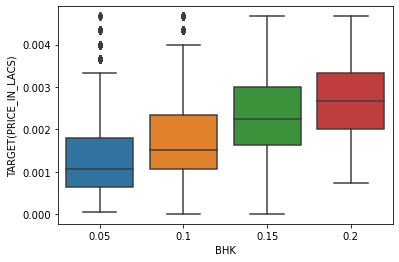

In [17]:
sns.boxplot(x = 'BHK', y = 'TARGET(PRICE_IN_LACS)', data = df)

<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='TARGET(PRICE_IN_LACS)'>

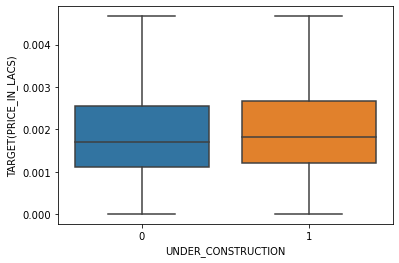

In [18]:
sns.boxplot(x = 'UNDER_CONSTRUCTION', y = 'TARGET(PRICE_IN_LACS)', data = df)

<AxesSubplot:xlabel='RERA', ylabel='TARGET(PRICE_IN_LACS)'>

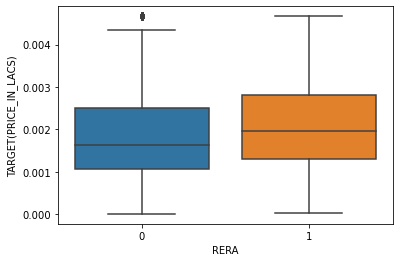

In [19]:
sns.boxplot(x = 'RERA', y = 'TARGET(PRICE_IN_LACS)', data = df)

<AxesSubplot:xlabel='READY_TO_MOVE', ylabel='TARGET(PRICE_IN_LACS)'>

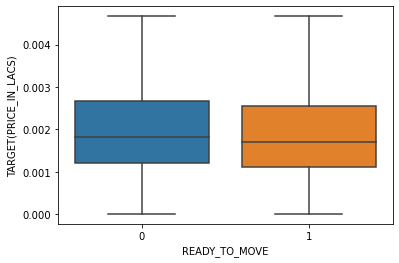

In [20]:
sns.boxplot(x = 'READY_TO_MOVE', y = 'TARGET(PRICE_IN_LACS)', data = df)

<AxesSubplot:xlabel='RESALE', ylabel='TARGET(PRICE_IN_LACS)'>

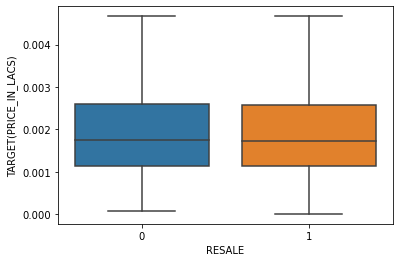

In [21]:
sns.boxplot(x = 'RESALE', y = 'TARGET(PRICE_IN_LACS)', data = df)

In [22]:
x = df.copy()

In [23]:
df[df.City =='Maharashtra']

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City
48,Dealer,1,1,0.05,BHK,0.000002,0,0,"Kalyan (West),Maharashtra",19.245347,73.124577,0.001330,Maharashtra
82,Dealer,0,0,0.10,BHK,0.000005,1,1,"Bhandup (West),Maharashtra",19.147866,72.932609,0.004667,Maharashtra
87,Dealer,0,0,0.10,BHK,0.000003,1,1,"Thane West,Maharashtra",19.180000,72.963330,0.003167,Maharashtra
120,Dealer,0,1,0.10,BHK,0.000004,1,1,"Taloja,Maharashtra",21.561280,74.212380,0.001130,Maharashtra
126,Dealer,0,0,0.05,BHK,0.000003,1,1,"Sector 20 Ulwe,Maharashtra",18.964489,73.019574,0.001633,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Dealer,0,0,0.10,BHK,0.000004,1,1,"Pokhran-2,Maharashtra",19.371618,72.824114,0.004333,Maharashtra
23523,Builder,1,1,0.10,BHK,0.000004,0,0,"Roha,Maharashtra",18.454300,73.114700,0.000920,Maharashtra
23530,Dealer,0,0,0.10,BHK,0.000004,1,1,"Kharghar,Maharashtra",19.038205,73.066120,0.004333,Maharashtra
23597,Dealer,0,1,0.10,BHK,0.000003,1,1,"Balkum,Maharashtra",19.222101,72.988231,0.003167,Maharashtra


In [24]:
# DE- NORMALIZE of simple scaling
df.BHK = df.BHK *20
df.SQUARE_FT = df.SQUARE_FT*254545454.5
df['TARGET(PRICE_IN_LACS)'] = df['TARGET(PRICE_IN_LACS)']*30000
df


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,Dealer,1,1,1.0,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai
23670,Owner,0,0,2.0,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Belgaum
23671,Dealer,0,0,2.0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
23672,Owner,0,0,2.0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


# Bins or Qualitative attributes


In [25]:
# PRICE BINNING
bins = np.array ([df['TARGET(PRICE_IN_LACS)'].min(),df['TARGET(PRICE_IN_LACS)'].quantile(0.25),df['TARGET(PRICE_IN_LACS)'].median(), df['TARGET(PRICE_IN_LACS)'].quantile(0.75),df['TARGET(PRICE_IN_LACS)'].max() ])
group_names_price = ['Low', 'Lower Mid', 'Higher Mid', ' High']
df['price_binned'] = pd.cut(df['TARGET(PRICE_IN_LACS)'], bins, labels = group_names_price, include_lowest = True )
df['price_binned'].head()


0    Higher Mid
1     Lower Mid
2     Lower Mid
3    Higher Mid
4    Higher Mid
Name: price_binned, dtype: category
Categories (4, object): ['Low' < 'Lower Mid' < 'Higher Mid' < ' High']

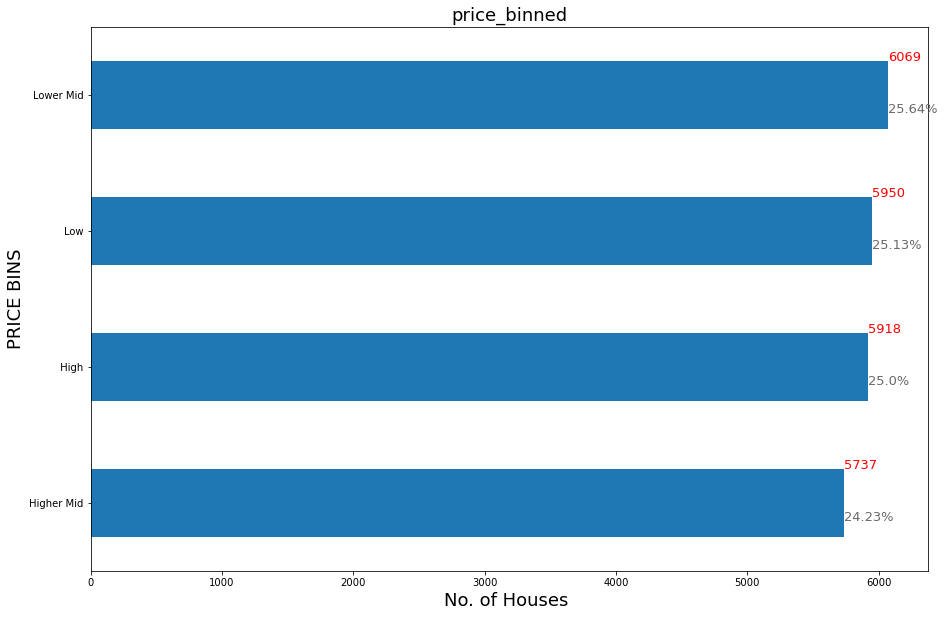

In [26]:
ax7 = df.price_binned.value_counts().plot(kind = 'barh', figsize = (15,10))
plt.title('price_binned',fontsize = 18)
plt.xlabel('No. of Houses ', fontsize = 18)
plt.ylabel('PRICE BINS', fontsize = 18)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax7.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax7.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax7.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
color='dimgrey')

for j in ax7.patches:
    ax7.text(j.get_width()-.15, j.get_y()-0.000005, \
            str(round(j.get_width(), 2)), fontsize=13, color='red')

# inverting for largest on the top
ax7.invert_yaxis()
plt.show()

In [27]:
# SQUARE FEET BINNING
bins_sqft = np.array ([df['SQUARE_FT'].min(),df['SQUARE_FT'].quantile(0.25), df['SQUARE_FT'].median(), df['SQUARE_FT'].quantile(0.75) ,df['SQUARE_FT'].max()])
group_names_sqft = ['Low sqft', 'Lower Mid sqft', 'Higher Mid sqft', ' High sqft'] 
df['sqft_binned'] = pd.cut(df['SQUARE_FT'], bins_sqft, labels = group_names_sqft, include_lowest = True )
df['sqft_binned'].head()

0    Higher Mid sqft
1    Higher Mid sqft
2     Lower Mid sqft
3     Lower Mid sqft
4     Lower Mid sqft
Name: sqft_binned, dtype: category
Categories (4, object): ['Low sqft' < 'Lower Mid sqft' < 'Higher Mid sqft' < ' High sqft']

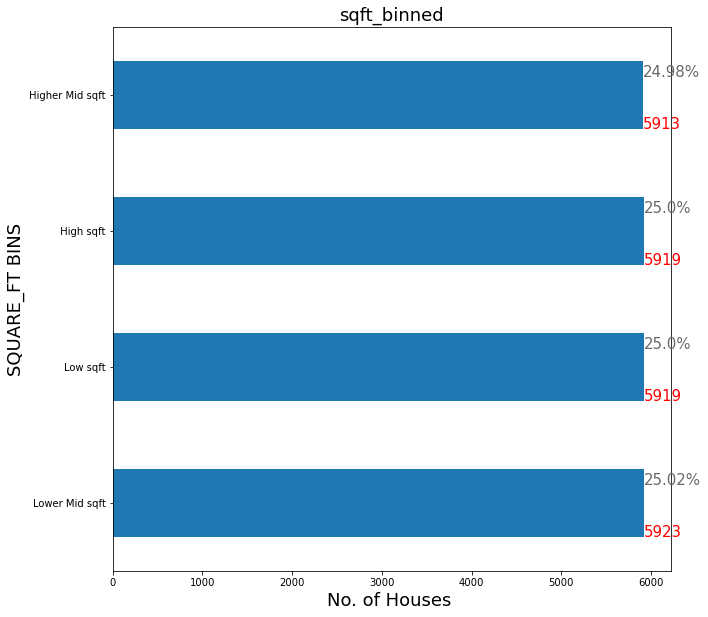

In [28]:
ax8 = df.sqft_binned.value_counts().plot(kind = 'barh', figsize = (10,10))
plt.title('sqft_binned',fontsize = 18)
plt.xlabel('No. of Houses ', fontsize = 18)
plt.ylabel('SQUARE_FT BINS', fontsize = 18)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax8.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax8.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax8.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

for j in ax8.patches:
    ax8.text(j.get_width()-.15, j.get_y()-0.000005, \
            str(round(j.get_width(), 2)), fontsize=15, color='red')


In [29]:
# LATITUDANAL ZONE BINNING
bins_lat = np.linspace(min(df['LATITUDE']), max(df['LATITUDE']), 4)
group_names_lat = ['South', 'Central', 'North']
df['lat_binned'] = pd.cut(df['LATITUDE'], bins_lat, labels = group_names_lat, include_lowest = True )
count_lat_binned = df['lat_binned'].value_counts()
count_lat_binned.rename({'lat_binned': 'value_counts'}, axis = 1, inplace = True)
count_lat_binned.index.name = 'lat_binned'
count_lat_binned.head()



lat_binned
Central    10764
North       7176
South       5734
Name: lat_binned, dtype: int64

<AxesSubplot:xlabel='lat_binned'>

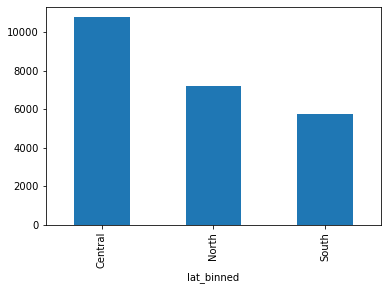

In [30]:
count_lat_binned.plot.bar()

In [31]:
# LONGITUDANAL ZONE BINNING
bins_long = np.linspace(min(df['LONGITUDE']), max(df['LONGITUDE']), 4)
group_names_long = ['WEST', 'Mid', 'East']
df['long_binned'] = pd.cut(df['LONGITUDE'], bins_long, labels = group_names_long, include_lowest = True )
count_long_binned = df['long_binned'].value_counts()
count_long_binned.rename({'long_binned': 'value_counts'}, axis = 1, inplace = True)
count_long_binned.index.name = 'long_binned'
count_long_binned.head()


long_binned
WEST    16718
Mid      5081
East     1875
Name: long_binned, dtype: int64

<AxesSubplot:xlabel='long_binned'>

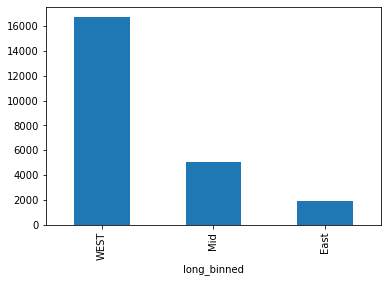

In [32]:
count_long_binned.plot.bar()

# REGRESSION PLOT with line of best fit 
For observing the impact of Quantitative attributes on TARGET_PRICE

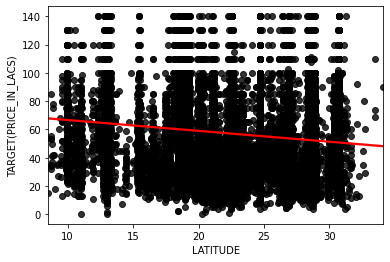

In [33]:
rplt1 = sns.regplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = df,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()
# Inference: -LINE OF BEST FIT(RED LINE) Steady decrease from WEST ZONE to EAST ZONE

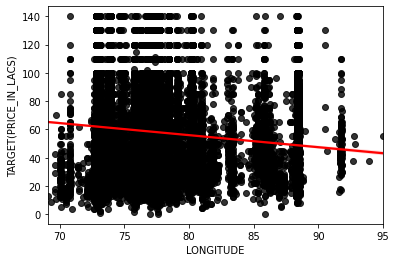

In [34]:
rplt2 = sns.regplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = df,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()
# Inference: LINE OF BEST FIT(RED LINE) - Steady decrease from North to East Zone 

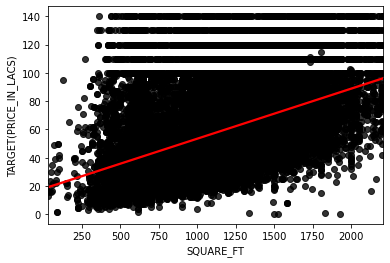

In [35]:
rplt3 = sns.regplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = df,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()
# Inference: LINE OF BEST FIT(RED LINE): - Perfect Correlation r = 1/ Directly Proportional to Target Price

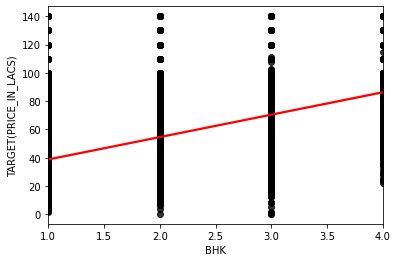

In [36]:
rplt4 = sns.regplot(x = 'BHK', y = 'TARGET(PRICE_IN_LACS)', data = df,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()
# Inference: LINE OF BEST FIT(RED LINE):- Gradual increase although not significant 

In [37]:
# Adding subcity column
subcity = df.ADDRESS.apply(lambda x: x.split(',')[-2])
df['subcity'] = subcity

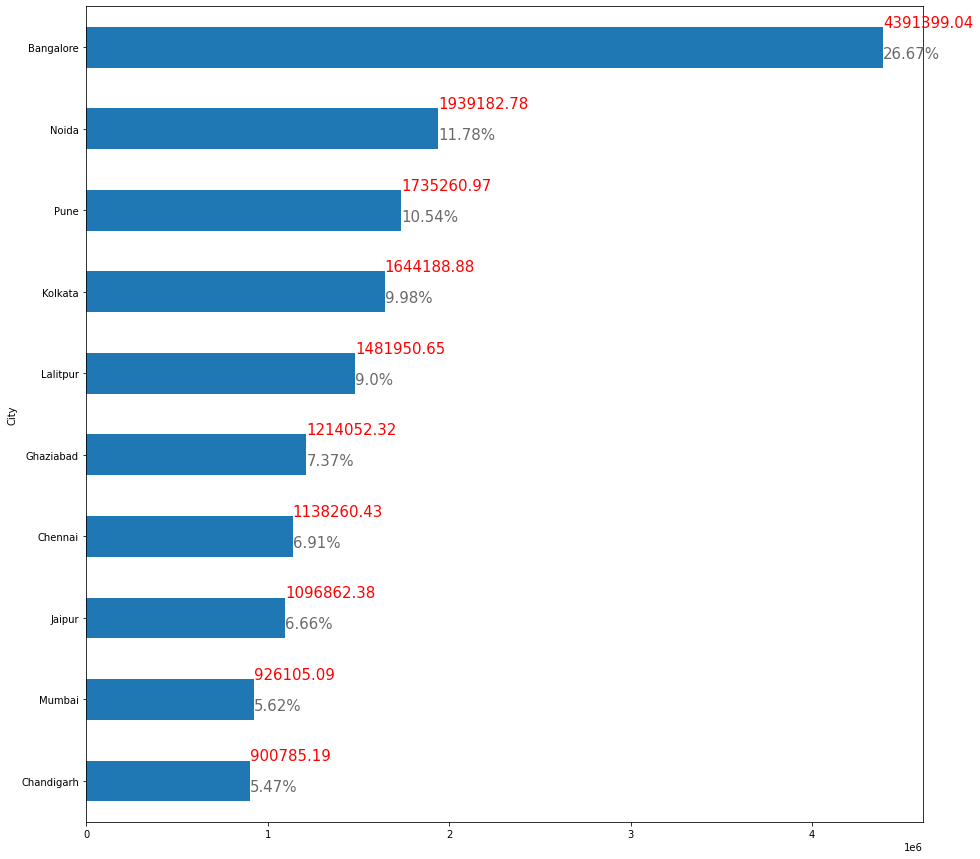

Inference:- Total square fit - city wise:-
1) Bangalore = 26.78% 	 2) Noida = 11.62% 	 3) Pune = 10.57% 
Bangalore, Noida and Pune account for 48.99% TOTAL SQUARE AREA of all properties of cleaned dataset


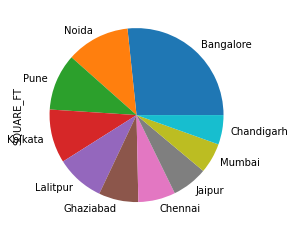

In [39]:
plt.figure(figsize=(15,15))
p0 = df.groupby(['City']).sum().SQUARE_FT.nlargest(10).plot(kind='barh')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p0.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p0.patches:
    # get_width pulls left or right; get_y pushes up or down
    p0.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

for j in p0.patches:
    p0.text(j.get_width()-.15, j.get_y()-0.000005, \
            str(round(j.get_width(), 2)), fontsize=15, color='red')

p0.invert_yaxis()
plt.show()
p0_pie = df.groupby(['City']).sum().SQUARE_FT.nlargest(10).plot(kind='pie')

print('Inference:- Total square fit - city wise:-')
print('1) Bangalore = 26.78%', '\t', '2) Noida = 11.62%', '\t', '3) Pune = 10.57% ')
print('Bangalore, Noida and Pune account for 48.99% TOTAL SQUARE AREA of all properties of cleaned dataset')


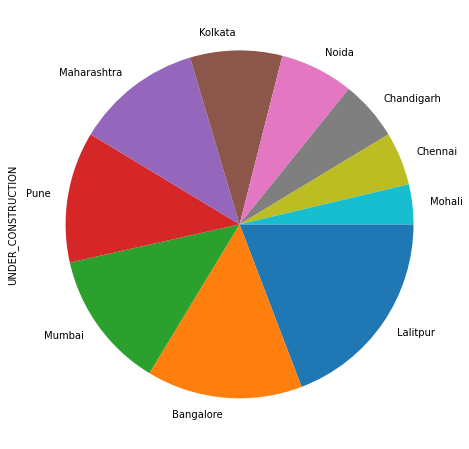

Lalitpur has the highest number of PROPERTIES that are UNDER CONSTRUCTION; followed by Bangalore and Mumbai.


In [40]:
plt.figure(figsize=(20 ,8))
p1 = df.groupby(['City']).sum().UNDER_CONSTRUCTION.nlargest(10).plot(kind='pie')
p1.invert_yaxis()
plt.show()
df.groupby(['City']).sum().UNDER_CONSTRUCTION.nlargest(10)
print('Lalitpur has the highest number of PROPERTIES that are UNDER CONSTRUCTION; followed by Bangalore and Mumbai.')

In [41]:
df_r = df.copy()
df_r


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City,price_binned,sqft_binned,lat_binned,long_binned,subcity
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Higher Mid,Higher Mid sqft,South,WEST,Ksfc Layout
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Lower Mid,Higher Mid sqft,South,WEST,Vishweshwara Nagar
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Lower Mid,Lower Mid sqft,South,WEST,Jigani
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Higher Mid,Lower Mid sqft,North,WEST,Sector-1 Vaishali
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,Higher Mid,Lower Mid sqft,Central,East,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,Dealer,1,1,1.0,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai,High,Low sqft,Central,WEST,Mulund (West)
23670,Owner,0,0,2.0,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Belgaum,Lower Mid,Lower Mid sqft,South,WEST,Tilakwadi
23671,Dealer,0,0,2.0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,Low,Lower Mid sqft,North,WEST,Ajmer Road
23672,Owner,0,0,2.0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,Higher Mid,Lower Mid sqft,South,Mid,Sholinganallur


In [42]:
# Setting the correct city for the rows having city as Maharashtra
df.City[df['City']=='Maharashtra'] = df.subcity[df['City']=='Maharashtra']

<ipython-input-42-546644211181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.City[df['City']=='Maharashtra'] = df.subcity[df['City']=='Maharashtra']


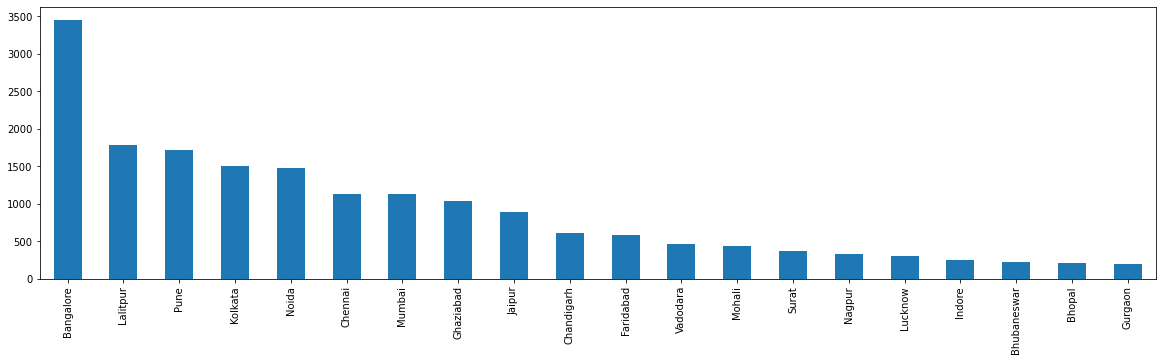

Bangalore has exceptionally high number of properties; followed by Lalitpur, Pune and Kolkata


In [43]:
plt.figure(figsize=(20 ,5))
df.City.value_counts()[:20].plot(kind='bar')
plt.show()
print('Bangalore has exceptionally high number of properties; followed by Lalitpur, Pune and Kolkata')

In [41]:
df.to_excel(" A13sept2021 property prices excel.xlsx")

In [44]:
df_p = df.copy()

In [43]:
# Changing Quantitative variable to Qualitative for 'grouping and classing'
df_p["RERA"].replace({0:False, 1: True}, inplace=True)
df_p["RESALE"].replace({0:False, 1: True}, inplace=True)
df_p["UNDER_CONSTRUCTION"].replace({0:False, 1: True}, inplace=True)
df_p["READY_TO_MOVE"].replace({0:False, 1: True}, inplace=True)
df_p

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City,price_binned,sqft_binned,lat_binned,long_binned,subcity
0,Owner,False,False,2.0,BHK,1300.236407,True,True,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Higher Mid,Higher Mid sqft,South,WEST,Ksfc Layout
1,Dealer,False,False,2.0,BHK,1275.000000,True,True,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Lower Mid,Higher Mid sqft,South,WEST,Vishweshwara Nagar
2,Owner,False,False,2.0,BHK,933.159722,True,True,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Lower Mid,Lower Mid sqft,South,WEST,Jigani
3,Owner,False,True,2.0,BHK,929.921143,True,True,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Higher Mid,Lower Mid sqft,North,WEST,Sector-1 Vaishali
4,Dealer,True,False,2.0,BHK,999.009247,False,True,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,Higher Mid,Lower Mid sqft,Central,East,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,Dealer,True,True,1.0,BHK,752.049334,False,True,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai,High,Low sqft,Central,WEST,Mulund (West)
24045,Owner,False,False,2.0,BHK,1062.134891,True,True,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Belgaum,Lower Mid,Lower Mid sqft,South,WEST,Tilakwadi
24046,Dealer,False,False,2.0,BHK,1022.641509,True,True,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,Low,Lower Mid sqft,North,WEST,Ajmer Road
24047,Owner,False,False,2.0,BHK,927.079009,True,True,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,Higher Mid,Lower Mid sqft,South,Mid,Sholinganallur


In [45]:
df_p

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City,price_binned,sqft_binned,lat_binned,long_binned,subcity
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Higher Mid,Higher Mid sqft,South,WEST,Ksfc Layout
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Lower Mid,Higher Mid sqft,South,WEST,Vishweshwara Nagar
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Lower Mid,Lower Mid sqft,South,WEST,Jigani
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Higher Mid,Lower Mid sqft,North,WEST,Sector-1 Vaishali
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,Higher Mid,Lower Mid sqft,Central,East,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,Dealer,1,1,1.0,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai,High,Low sqft,Central,WEST,Mulund (West)
23670,Owner,0,0,2.0,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Belgaum,Lower Mid,Lower Mid sqft,South,WEST,Tilakwadi
23671,Dealer,0,0,2.0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,Low,Lower Mid sqft,North,WEST,Ajmer Road
23672,Owner,0,0,2.0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,Higher Mid,Lower Mid sqft,South,Mid,Sholinganallur


<AxesSubplot:ylabel='City'>

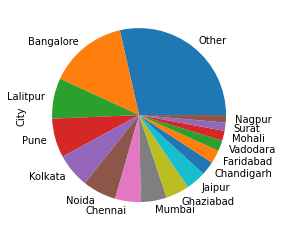

In [46]:
# Classification of TOP-15 cities and OTHERS on the basis of property-counts
df_q = df_p.copy()
top_cities1 = df_q.City.value_counts().nlargest(15).index
df_q.City = df_q.City.apply(lambda p: p if p in top_cities1 else 'Other')
df_q.City.value_counts()
top15_cities1 =df_q.City.value_counts()

top15_cities1.plot(kind = 'pie')

In [47]:
df_q

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET(PRICE_IN_LACS),City,price_binned,sqft_binned,lat_binned,long_binned,subcity
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Higher Mid,Higher Mid sqft,South,WEST,Ksfc Layout
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Other,Lower Mid,Higher Mid sqft,South,WEST,Vishweshwara Nagar
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Lower Mid,Lower Mid sqft,South,WEST,Jigani
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Higher Mid,Lower Mid sqft,North,WEST,Sector-1 Vaishali
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,Higher Mid,Lower Mid sqft,Central,East,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,Dealer,1,1,1.0,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai,High,Low sqft,Central,WEST,Mulund (West)
23670,Owner,0,0,2.0,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,Other,Lower Mid,Lower Mid sqft,South,WEST,Tilakwadi
23671,Dealer,0,0,2.0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,Low,Lower Mid sqft,North,WEST,Ajmer Road
23672,Owner,0,0,2.0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,Higher Mid,Lower Mid sqft,South,Mid,Sholinganallur


In [47]:
df_q.to_excel('B new 13 sept 2021  PROPEREST dataset after all editing.xlsx')

In [48]:
df_only_top15 = df_q.copy()

In [49]:
df_only_top15  = df_only_top15.drop(df_only_top15.index[df_only_top15['City'] == 'Other'], inplace = True)

In [50]:
df_only_top15 


In [51]:
df_c = df_q.copy()

In [52]:
df_c = df_c[df_c.City != 'Other']


In [53]:
print('ONLY TOP 15 cities',df_c.shape)
print('cleaned dataset',df.shape)
print('cleaned dataset with TOP15 cities and OTHERS',df_q.shape)
print(16913/24049 *100,'%', 'datapoints are retained representing top 15 cities')

ONLY TOP 15 cities (16913, 18)
cleaned dataset (23674, 18)
cleaned dataset with TOP15 cities and OTHERS (23674, 18)
70.32724853424259 % datapoints are retained representing top 15 cities


df is the original dataframe with outliers removed
df_c is the dataframe of TOP 15 cities using python
df_tableau is the dataframe after geological and tableau viz processing

# DATASET AFTER GEOSPATIAL PROCESSING USING TABLEAU 

In [54]:
df_tableau = pd.read_csv('Sheet1 (TOP 15 cities 16000 datapoints)_Sheet1.csv')
df_tableau

,Address,Bhk Or Rk,City,Lat Binned,Long Binned,Posted By,Price Binned,Ready To Move,Rera,Resale,Sqft Binned,Subcity,Under Construction,BHK,F1,Latitude,Longitude,Square Ft,Target(Price In Lacs)
0,"Ksfc Layout,Bangalore",BHK,Bangalore,South,WEST,Owner,Higher Mid,True,False,True,Higher Mid sqft,Ksfc Layout,False,2,0,12.969910,77.597960,1300.236407,55.0
1,"Jigani,Bangalore",BHK,Bangalore,South,WEST,Owner,Lower Mid,True,False,True,Lower Mid sqft,Jigani,False,2,2,12.778033,77.632191,933.159722,43.0
2,"Sector-1 Vaishali,Ghaziabad",BHK,Ghaziabad,North,WEST,Owner,Higher Mid,True,True,True,Lower Mid sqft,Sector-1 Vaishali,False,2,3,28.642300,77.344500,929.921143,62.5
3,"New Town,Kolkata",BHK,Kolkata,Central,East,Dealer,Higher Mid,False,False,True,Lower Mid sqft,New Town,True,2,4,22.592200,88.484911,999.009247,60.5
4,"Sodala,Jaipur",BHK,Jaipur,North,WEST,Dealer,Higher Mid,True,False,True,High sqft,Sodala,False,3,6,26.916347,75.795600,1495.053957,66.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,"Makhmalabad,Lalitpur",RK,Lalitpur,Central,Mid,Builder,Low,False,True,False,Low sqft,Makhmalabad,True,1,24264,24.690280,78.418890,419.607843,10.7
13575,"Taloja,Lalitpur",RK,Lalitpur,Central,Mid,Builder,Low,False,True,False,Low sqft,Taloja,True,1,24676,24.690280,78.418890,237.054695,17.9
13576,"Khanda Colony,Lalitpur",RK,Lalitpur,Central,Mid,Builder,Lower Mid,False,True,False,Low sqft,Khanda Colony,True,1,22722,24.690280,78.418890,366.577620,49.4
13577,"Boisar,Lalitpur",RK,Lalitpur,Central,Mid,Dealer,Low,False,True,False,Low sqft,Boisar,True,1,26299,24.690280,78.418890,246.957767,13.8


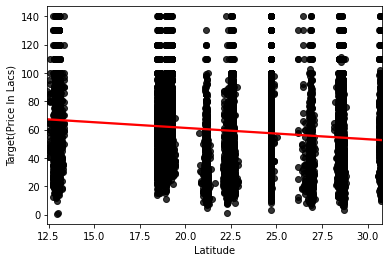

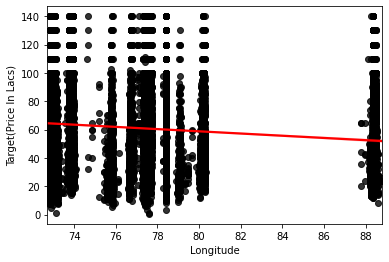

In [55]:
lat_tab = sns.regplot(x = 'Latitude', y = 'Target(Price In Lacs)', data = df_tableau ,scatter_kws={"color": "black"}, line_kws= {"color": "red"})

plt.show()
long_tab = sns.regplot(x = 'Longitude', y = 'Target(Price In Lacs)', data = df_tableau ,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()

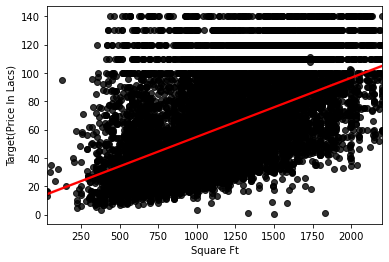

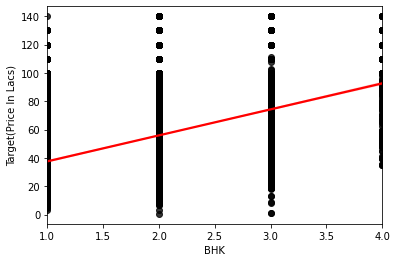

In [56]:
sqft_tab = sns.regplot(x = 'Square Ft', y = 'Target(Price In Lacs)', data = df_tableau ,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()
bhk_tab = sns.regplot(x = 'BHK', y = 'Target(Price In Lacs)', data = df_tableau ,scatter_kws={"color": "black"}, line_kws= {"color": "red"})
plt.show()

In [57]:
df_only_top15 

<AxesSubplot:xlabel='Sqft Binned', ylabel='Target(Price In Lacs)'>

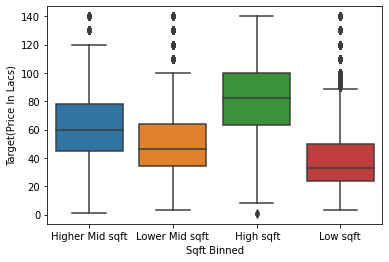

In [58]:
sns.boxplot(x = 'Sqft Binned' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='BHK', ylabel='Target(Price In Lacs)'>

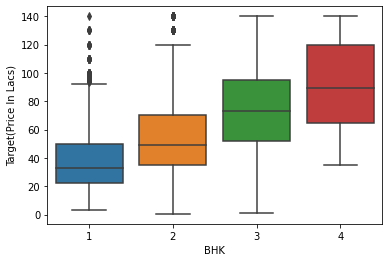

In [59]:
sns.boxplot(x = 'BHK' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Lat Binned', ylabel='Target(Price In Lacs)'>

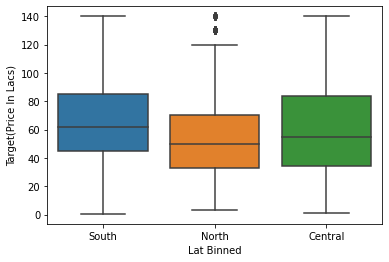

In [60]:
sns.boxplot(x = 'Lat Binned' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Long Binned', ylabel='Target(Price In Lacs)'>

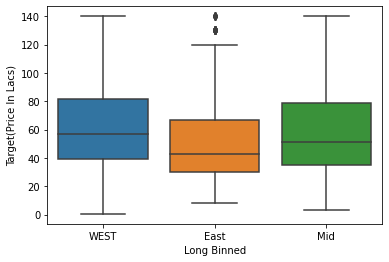

In [61]:
sns.boxplot(x = 'Long Binned' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Posted By', ylabel='Target(Price In Lacs)'>

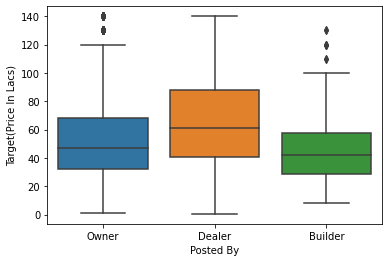

In [62]:
sns.boxplot(x = 'Posted By' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Resale', ylabel='Target(Price In Lacs)'>

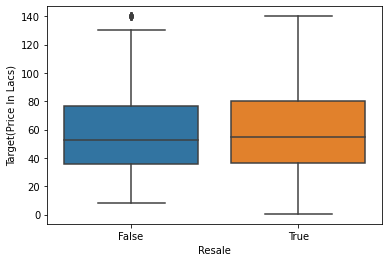

In [63]:
sns.boxplot(x = 'Resale' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Ready To Move', ylabel='Target(Price In Lacs)'>

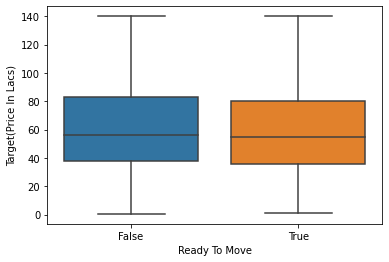

In [64]:
sns.boxplot(x = 'Ready To Move' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Rera', ylabel='Target(Price In Lacs)'>

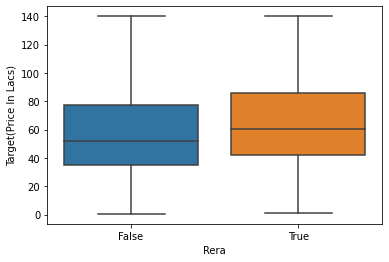

In [65]:
sns.boxplot(x = 'Rera' , y = 'Target(Price In Lacs)', data = df_tableau)

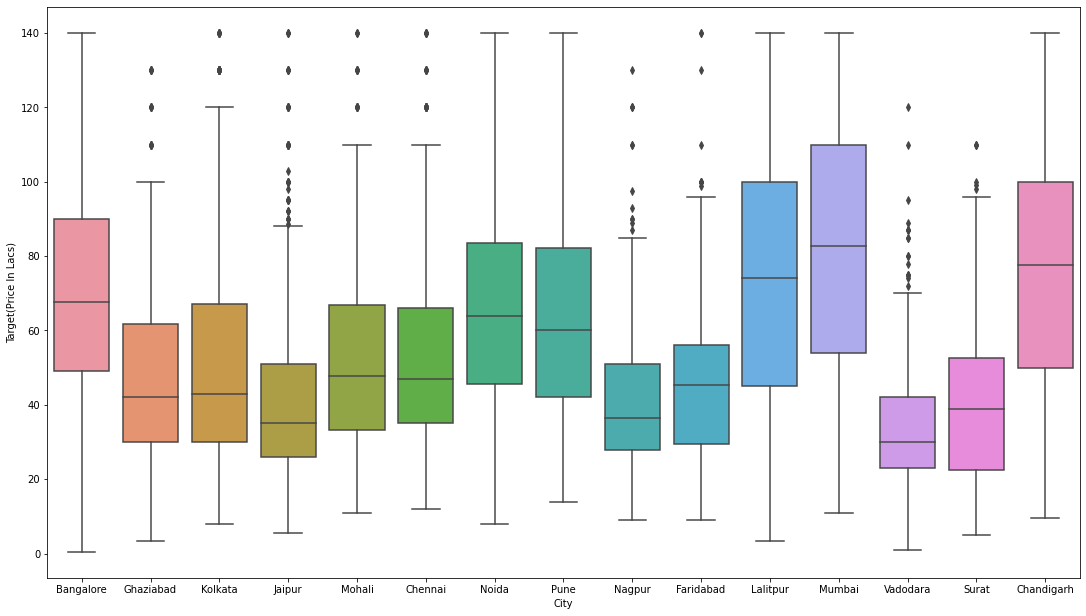

In [70]:
City_boxplot = sns.boxplot(x = 'City' , y = 'Target(Price In Lacs)', data = df_tableau)
City_boxplot.figure.set_size_inches(18.5, 10.5)

<AxesSubplot:xlabel='Bhk Or Rk', ylabel='Target(Price In Lacs)'>

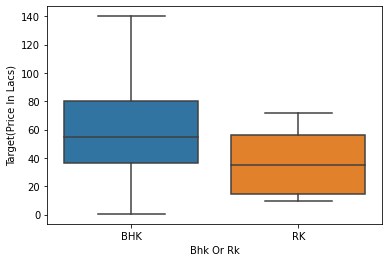

In [71]:
sns.boxplot(x = 'Bhk Or Rk' , y = 'Target(Price In Lacs)', data = df_tableau)

<AxesSubplot:xlabel='Under Construction', ylabel='Target(Price In Lacs)'>

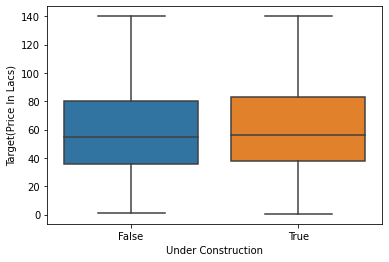

In [72]:
sns.boxplot(x = 'Under Construction' , y = 'Target(Price In Lacs)', data = df_tableau)

The number of outliers have been greatly reduced. 
But, in the city wise BOX-PLOT ; ouliers are high in number as REAL ESTATE PRICES are quite irregular and this moreover shows in which city; the property price vary to a great extent .
This can help to do data-driven decision making with much more ease.

# INFERENCES from Basic Graphs about the Property Market

In [138]:
df_tableau.head()

,Address,Bhk Or Rk,City,Lat Binned,Long Binned,Posted By,Price Binned,Ready To Move,Rera,Resale,Sqft Binned,Subcity,Under Construction,BHK,F1,Latitude,Longitude,Square Ft,Target(Price In Lacs)
0,"Ksfc Layout,Bangalore",BHK,Bangalore,South,WEST,Owner,Higher Mid,True,False,True,Higher Mid sqft,Ksfc Layout,False,2,0,12.969910,77.597960,1300.236407,55.0
1,"Jigani,Bangalore",BHK,Bangalore,South,WEST,Owner,Lower Mid,True,False,True,Lower Mid sqft,Jigani,False,2,2,12.778033,77.632191,933.159722,43.0
2,"Sector-1 Vaishali,Ghaziabad",BHK,Ghaziabad,North,WEST,Owner,Higher Mid,True,True,True,Lower Mid sqft,Sector-1 Vaishali,False,2,3,28.642300,77.344500,929.921143,62.5
3,"New Town,Kolkata",BHK,Kolkata,Central,East,Dealer,Higher Mid,False,False,True,Lower Mid sqft,New Town,True,2,4,22.592200,88.484911,999.009247,60.5
4,"Sodala,Jaipur",BHK,Jaipur,North,WEST,Dealer,Higher Mid,True,False,True,High sqft,Sodala,False,3,6,26.916347,75.795600,1495.053957,66.5


INFERENCE:- Properties will most likely be posted by Dealers followed by Owners and very little by Builders


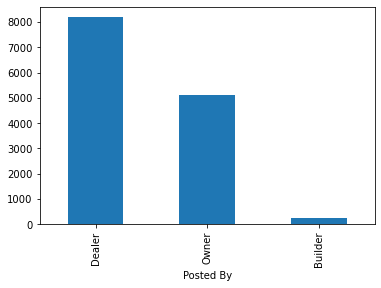

In [149]:
df_tableau.value_counts('Posted By').plot(kind= 'bar')
print('INFERENCE:- Properties will most likely be posted by Dealers followed by Owners and very little by Builders')

INFERENCE:- Properties are more likely to be on sale after being ready to move


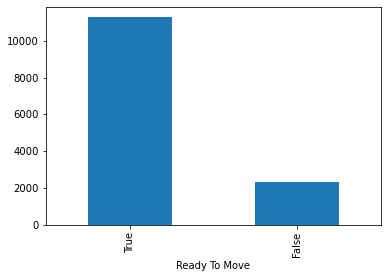

In [150]:
df_tableau.value_counts('Ready To Move').plot(kind= 'bar')
print('INFERENCE:- Properties are more likely to be on sale after being ready to move')

INFERENCE: Properties are more likely to be CONSTRUCTED when put for SALE


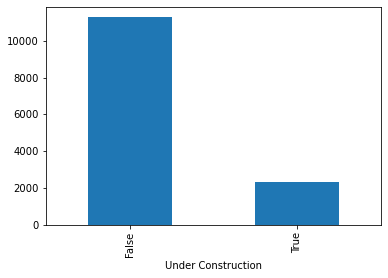

In [151]:
df_tableau.value_counts('Under Construction').plot(kind= 'bar')
print('INFERENCE: Properties are more likely to be CONSTRUCTED when put for SALE')

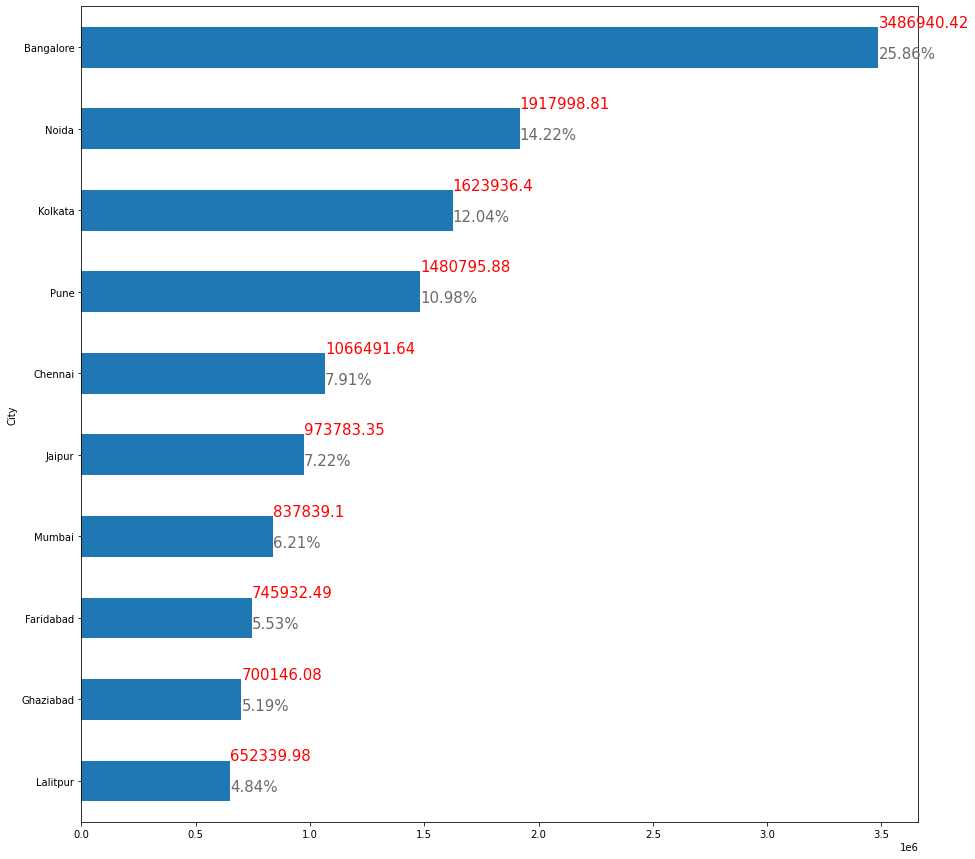

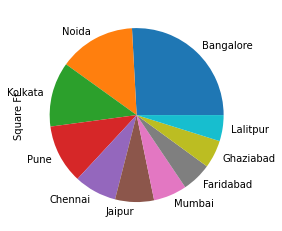

In [63]:
plt.figure(figsize=(15,15))
p3 = df_tableau.groupby(['City']).sum()['Square Ft'].nlargest(10).plot(kind='barh')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p3.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p3.patches:
    # get_width pulls left or right; get_y pushes up or down
    p3.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

for j in p3.patches:
    p3.text(j.get_width()-.15, j.get_y()-0.000005, \
            str(round(j.get_width(), 2)), fontsize=15, color='red')

p3.invert_yaxis()
plt.show()
p3_pie = df_tableau.groupby(['City']).sum()['Square Ft'].nlargest(10).plot(kind='pie')



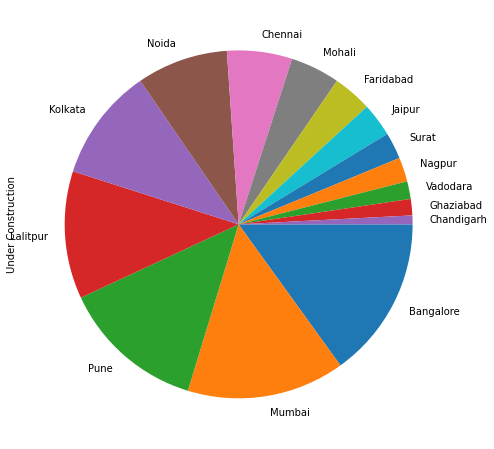

Bangalore has the highest number of PROPERTIES that are UNDER CONSTRUCTION; followed by Mumbai and Pune.


In [108]:
df_tableau.groupby(['City']).sum()['Under Construction' ].nlargest(15)
plt.figure(figsize=(20 ,8))
p4 = df_tableau.groupby(['City']).sum()['Under Construction'].nlargest(15).plot(kind='pie')
p4.invert_yaxis()
plt.show()
print('Bangalore has the highest number of PROPERTIES that are UNDER CONSTRUCTION; followed by Mumbai and Pune.')

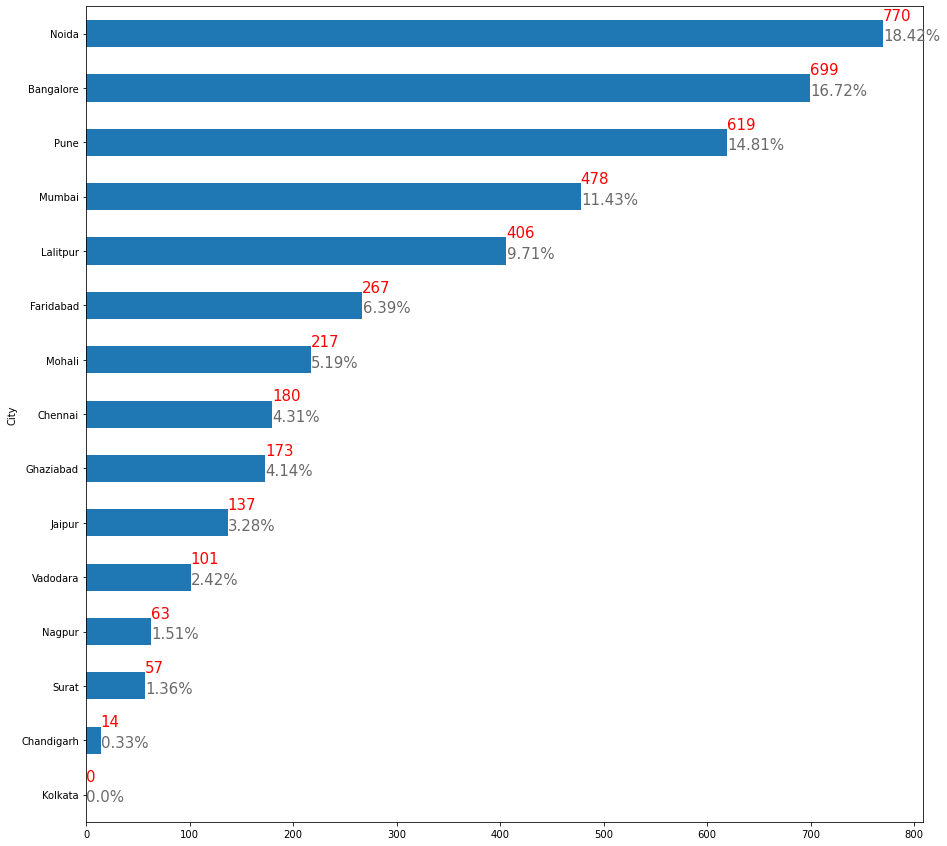

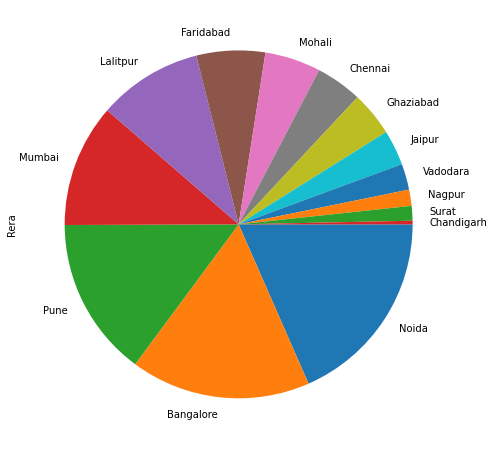

Noida accounts for 18.42 % of the TOP 15 cities properties that are RERA registered, followed by Bangalore and Pune


In [106]:
plt.figure(figsize=(15,15))
p6 = df_tableau.groupby(['City']).sum()['Rera'].nlargest(15).plot(kind='barh')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p6.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p6.patches:
    # get_width pulls left or right; get_y pushes up or down
    p6.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

for j in p6.patches:
    p6.text(j.get_width()-.15, j.get_y()-0.000005, \
            str(round(j.get_width(), 2)), fontsize=15, color='red')

p6.invert_yaxis()
plt.show()
df_tableau.groupby(['City']).sum()['Rera'].nlargest(15)
plt.figure(figsize=(20 ,8))
p5 = df_tableau.groupby(['City']).sum()['Rera'].nlargest(15).plot(kind='pie')
p5.invert_yaxis()
plt.show()
print('Noida accounts for 18.42 % of the TOP 15 cities properties that are RERA registered, followed by Bangalore and Pune')


Furthermore Geospatial Analysis and Business Oriented Data Analysis done on Tableau Public
LINK :- https://public.tableau.com/views/top15cities_27sept2021_withdashboards/Dashboard3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Dashboards, Story and slides are shared on this link.